In [2]:
# importa as bibliotecas que serão usadas
import pandas as pd
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metrhttps://github.com/ledmaster/notebooks_tutoriais/blob/master/live12_timeseries_prophet/nb1.ipynbic


In [3]:
# ler a base de dados usada.
# series = pd.read_csv('../data/champagne_sales.csv', header=0, index_col=0, parse_dates=True).squeeze()
series = pd.read_csv('../data/data_generation.csv', parse_dates=True)
series

,ds,y
0,2021-06-09,14732
1,2020-01-05,18801
2,2017-12-24,13361
3,2019-03-27,11884
4,2021-10-28,13036
...,...,...
995,2018-06-30,14572
996,2022-05-22,16401
997,2017-10-06,16781
998,2018-12-26,11260


In [4]:
series = series.groupby(['ds']).agg({'y':sum}).squeeze()

In [5]:
series.describe()

count      767.000000
mean     19578.561930
std       9144.859495
min      10005.000000
25%      13640.000000
50%      16677.000000
75%      20390.000000
max      72006.000000
Name: y, dtype: float64

### Mês anterior

In [6]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 1

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = np.mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%.2f, Valor real=%.2f' % (valor_predito, valor_real))                 

Valor predito=17387.00, Valor real=14682.00
Valor predito=14682.00, Valor real=16781.00
Valor predito=16781.00, Valor real=14444.00
Valor predito=14444.00, Valor real=19104.00
Valor predito=19104.00, Valor real=13080.00
Valor predito=13080.00, Valor real=14747.00
Valor predito=14747.00, Valor real=27328.00
Valor predito=27328.00, Valor real=10712.00
Valor predito=10712.00, Valor real=18712.00
Valor predito=18712.00, Valor real=15079.00
Valor predito=15079.00, Valor real=14432.00
Valor predito=14432.00, Valor real=17589.00
Valor predito=17589.00, Valor real=29606.00
Valor predito=29606.00, Valor real=14401.00
Valor predito=14401.00, Valor real=29585.00
Valor predito=29585.00, Valor real=23787.00
Valor predito=23787.00, Valor real=10862.00
Valor predito=10862.00, Valor real=18902.00
Valor predito=18902.00, Valor real=45439.00
Valor predito=45439.00, Valor real=29576.00
Valor predito=29576.00, Valor real=13843.00
Valor predito=13843.00, Valor real=16112.00
Valor predito=16112.00, Valor re

In [7]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))      
mape = mean_absolute_percentage_error(test, predicoes)
# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)                         
print('Métrica MAPE: %.3f' % mape)                         

Métrica RMSE: 12694.244
Métrica MAPE: 0.468


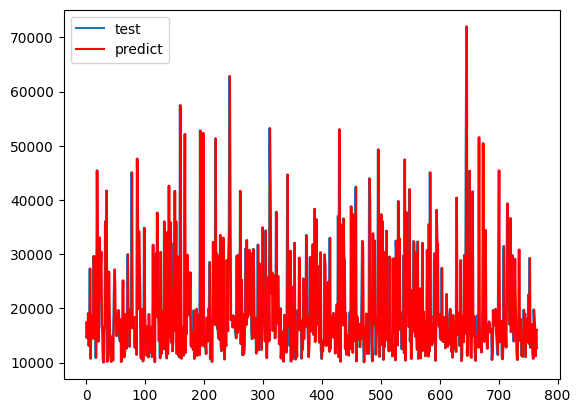

In [8]:
# plot o valor real (test) e as predições 
plt.plot(test) 
plt.plot(predicoes, color='red')
plt.legend(['test', 'predict'])
plt.show()

### Rolling Window

In [9]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = np.mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=16283.333333, Valor real=14444.000000
Valor predito=15302.333333, Valor real=19104.000000
Valor predito=16776.333333, Valor real=13080.000000
Valor predito=15542.666667, Valor real=14747.000000
Valor predito=15643.666667, Valor real=27328.000000
Valor predito=18385.000000, Valor real=10712.000000
Valor predito=17595.666667, Valor real=18712.000000
Valor predito=18917.333333, Valor real=15079.000000
Valor predito=14834.333333, Valor real=14432.000000
Valor predito=16074.333333, Valor real=17589.000000
Valor predito=15700.000000, Valor real=29606.000000
Valor predito=20542.333333, Valor real=14401.000000
Valor predito=20532.000000, Valor real=29585.000000
Valor predito=24530.666667, Valor real=23787.000000
Valor predito=22591.000000, Valor real=10862.000000
Valor predito=21411.333333, Valor real=18902.000000
Valor predito=17850.333333, Valor real=45439.000000
Valor predito=25067.666667, Valor real=29576.000000
Valor predito=31305.666667, Valor real=13843.000000
Valor predit

In [10]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))      
mape = mean_absolute_percentage_error(test, predicoes)
# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)                         
print('Métrica MAPE: %.3f' % mape)                         

Métrica RMSE: 10510.380
Métrica MAPE: 0.402


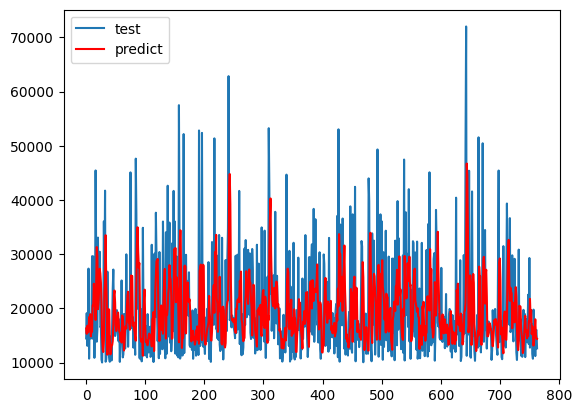

In [11]:
# plot o valor real (test) e as predições 
plt.plot(test) 
plt.plot(predicoes, color='red')
plt.legend(['test', 'predict'])
plt.show()

### Prophet

In [12]:
series

ds
2017-10-02    17387
2017-10-04    14682
2017-10-06    16781
2017-10-08    14444
2017-10-10    19104
              ...  
2022-09-28    16154
2022-09-29    11187
2022-10-07    15866
2022-10-08    16011
2022-10-10    12614
Name: y, Length: 767, dtype: int64

In [13]:
series

ds
2017-10-02    17387
2017-10-04    14682
2017-10-06    16781
2017-10-08    14444
2017-10-10    19104
              ...  
2022-09-28    16154
2022-09-29    11187
2022-10-07    15866
2022-10-08    16011
2022-10-10    12614
Name: y, Length: 767, dtype: int64

In [18]:
data_lower = '2017-07-01'
data_upper = '2022-08-30'
train  = series.loc[data_lower:data_upper]
test = series.loc[data_upper:]

In [29]:
def run_prophet(train, test, period):
    prophet = Prophet()
    prophet.fit(train)

    future = prophet.make_future_dataframe(24, include_history=False, freq='D')
    fcst = prophet.predict(future)

    rmse = sqrt(mean_squared_error(test, fcst))      
    mape = mean_absolute_percentage_error(test, fcst)
    return prophet, fcst, rmse, mape

In [ ]:

df_cv = cross_validation(train, initial='28 days', period='7 days', horizon = '7 days')
df_cv.head()

In [ ]:
plot_cross_validation_metric(df_cv_nonzero, 'mape')
prophet_7d.plot_components(fcst)
df_cv_nonzero = df_cv[df_cv['y'] != 0]
perf = performance_metrics(df_cv_nonzero)
perf.sort_values("horizon")